## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from sklearn.preprocessing import StandardScaler

## Load Dataset

In [2]:
dftrain_data = pd.read_csv("train.csv")
dftest_data = pd.read_csv("test.csv")

In [3]:
print("Shape of train data: ",dftrain_data.shape)
print("Shape of test data: ",dftest_data.shape)

Shape of train data:  (1460, 81)
Shape of test data:  (1459, 80)


In [4]:
dftrain_data.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1418,1419,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,COD,Normal,124000
999,1000,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,206000
610,611,60,RL,NaN,11050,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,313000
721,722,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,143000
956,957,160,RM,24.0,1300,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,124000
341,342,20,RH,60.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,82000
1113,1114,20,RL,66.0,8923,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,134500
573,574,80,RL,76.0,9967,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,170000
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
578,579,160,FV,34.0,3604,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,146000


In [5]:
dftest_data.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
729,2190,90,RL,65.0,6012,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand
835,2296,60,RL,134.0,16659,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,New,Partial
538,1999,60,RL,97.0,10990,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
467,1928,20,RL,83.0,13383,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
986,2447,70,RM,NaN,10337,Pave,Pave,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2007,WD,Normal
708,2169,60,RL,68.0,8998,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
431,1892,20,RL,64.0,6410,Pave,NaN,Reg,HLS,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal
521,1982,120,RL,48.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
488,1949,20,RL,63.0,12680,Pave,NaN,IR1,Lvl,AllPub,...,141,0,NaN,NaN,NaN,0,6,2008,WD,Normal
561,2022,20,RL,95.0,19508,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


## Data Integration

In [6]:
pd.set_option("display.max_columns",None)

In [7]:
df = pd.concat([dftrain_data,dftest_data])

In [8]:
df.shape

(2919, 81)

In [9]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
418,1879,20,RL,NaN,16269,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1978,1978,Gable,CompShg,MetalSd,MetalSd,BrkFace,76.0,TA,TA,BrkTil,Gd,TA,Av,GLQ,625.0,Unf,0.0,282.0,907.0,GasA,TA,Y,SBrkr,907,0,0,907,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1978.0,Unf,1.0,343.0,TA,TA,Y,72,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,NaN
1028,2489,20,RL,91.0,11375,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,5,1954,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,736.0,Unf,0.0,231.0,967.0,GasA,TA,Y,SBrkr,1299,0,0,1299,0.0,0.0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1954.0,Unf,2.0,494.0,TA,TA,Y,81,0,280,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,NaN
1193,1194,120,RM,NaN,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5,1999,1999,Hip,CompShg,VinylSd,VinylSd,BrkFace,425.0,TA,TA,PConc,Ex,TA,No,GLQ,883.0,Unf,0.0,341.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1999.0,Fin,2.0,402.0,TA,TA,Y,0,304,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,165000.0
776,2237,20,RL,85.0,11447,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,674.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1571.0,Unf,0.0,393.0,1964.0,GasA,Ex,Y,SBrkr,1964,0,0,1964,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,3.0,892.0,TA,TA,Y,0,265,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,NaN
317,318,60,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1088.0,1088.0,GasA,Ex,Y,SBrkr,1088,871,0,1959,0.0,0.0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2006.0,RFn,3.0,1025.0,TA,TA,Y,208,46,0,0,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal,270000.0


## Get the brief information about dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [11]:
int_df = df.select_dtypes(include = "int64").columns
print(int_df.tolist())
print("Total number of numerical features: ",int_df.shape[0])

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Total number of numerical features:  26


In [12]:
float_df = df.select_dtypes(include = "float64").columns
print(float_df.tolist())
print("Total number of columns: ",float_df.shape[0])

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']
Total number of columns:  12


In [13]:
object_df = df.select_dtypes(include = "object").columns
print(object_df.tolist())
print("Total number of categorical features: ",object_df.shape[0])

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Total number of categorical features:  43


## Get the Statistical Information of Numerical Features

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [15]:
df.describe().shape

(8, 38)

## Visualise null/Missing values

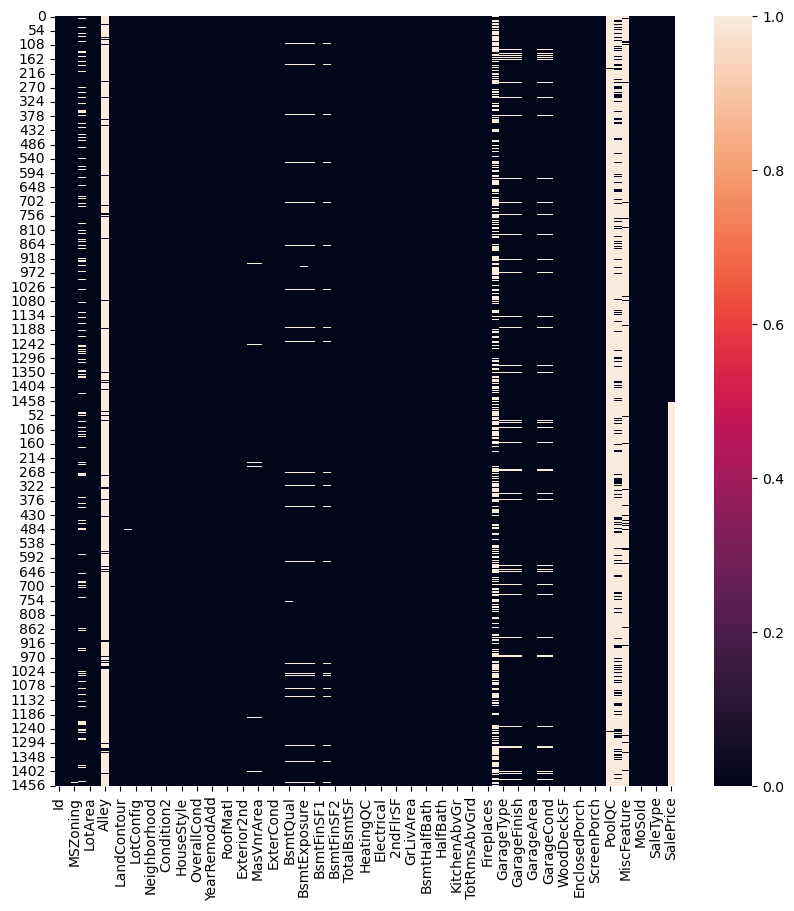

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.savefig("images/nullvalues.png")

## Get the null value percentage for every featiure

In [17]:
pd.set_option("display.max_rows",None)

In [18]:
null_count = df.isnull().sum()
null_count

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [19]:
null_percent = (df.isnull().sum()/len(df))*100
null_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

## Drop columns/Features
As per observation we wil not drop any feature from dataset.

In [20]:
"""As per domain knowledge we will not drop those features,instead none value we will add constant value"""
missing_value_percent = null_percent[null_percent > 50]
missing_value_percent

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [21]:
df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [22]:
"""As per domain knowledge we will not drop FireplaceQufeatures,instead none value we will add constant value"""
missing_value_20_50percent = null_percent[(null_percent > 20) & (null_percent < 50)]
missing_value_20_50percent

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [23]:
missing_value_5_20percent = null_percent[(null_percent > 5) & (null_percent < 21)]
missing_value_5_20percent

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [24]:
df["LotFrontage"].value_counts().head()

60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64

<Axes: >

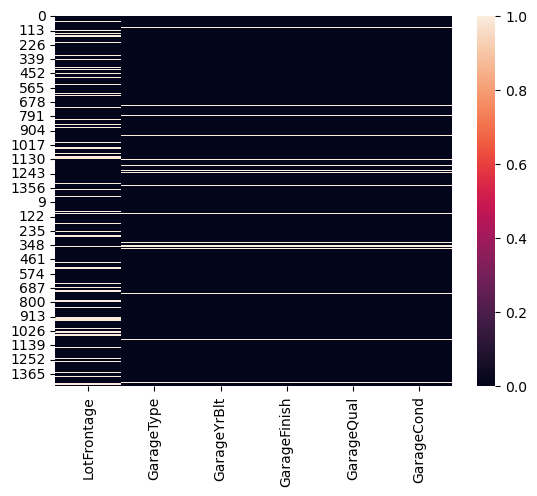

In [25]:
sns.heatmap(df[missing_value_5_20percent.keys()].isnull())

## Missing Value Imputation

In [26]:
missing_value_feature = null_percent[null_percent > 0]
print("Total missing value feature =  ",len(missing_value_feature))

Total missing value feature =   35


In [27]:
object_na = missing_value_feature[missing_value_feature.keys().isin(object_df)]
print("Total number of categorical missing features = ",len(object_na))
object_na

Total number of categorical missing features =  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [28]:
int_na = missing_value_feature[missing_value_feature.keys().isin(int_df)]
print("Total number of numerical missing features = ",len(int_na))
int_na

Total number of numerical missing features =  0


Series([], dtype: float64)

In [29]:
float_na = missing_value_feature[missing_value_feature.keys().isin(float_df)]
print("Total number of missing features = ",len(float_na))
float_na


Total number of missing features =  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

### Handling MSZoning = 0.137033

In [30]:
df["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

<Axes: xlabel='MSZoning', ylabel='count'>

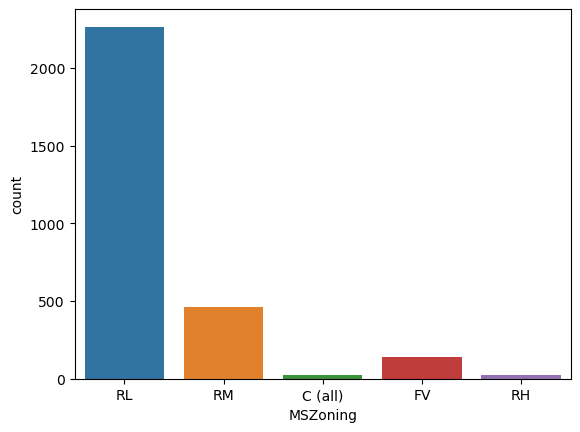

In [31]:
sns.countplot(x = df["MSZoning"])

In [32]:
MSZoning_mode = df["MSZoning"].mode()[0]
MSZoning_mode

'RL'

### backup of original dataset

In [33]:
df_mvi = df.copy()
df_mvi.shape

(2919, 81)

In [34]:
df_mvi["MSZoning"] = df_mvi["MSZoning"].replace(np.nan,MSZoning_mode)

In [35]:
df_mvi["MSZoning"].isnull().sum()

0

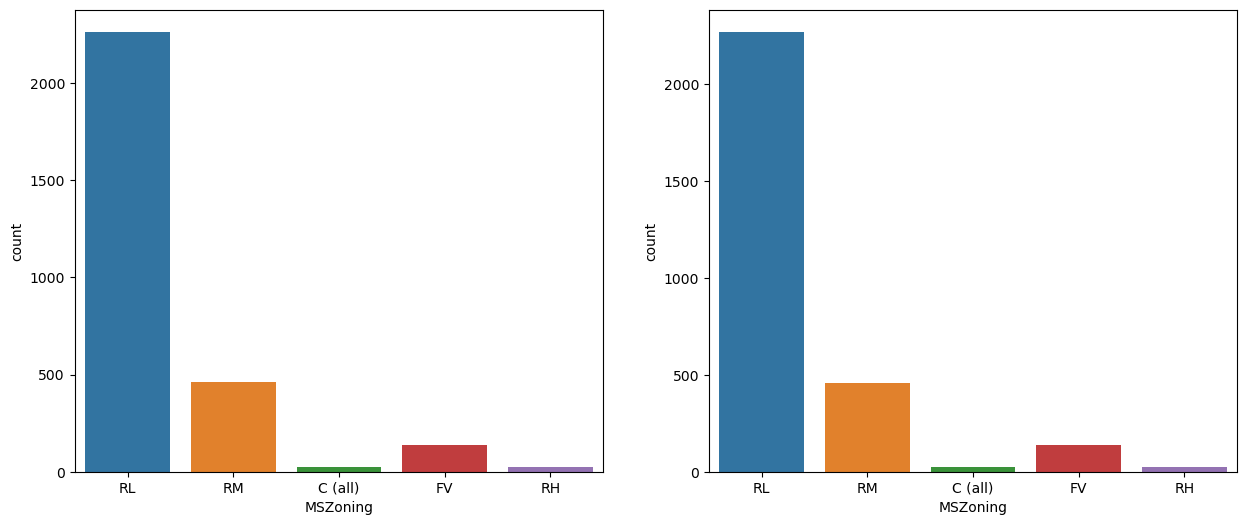

In [36]:
def Countplot(df,df_new,feature) :
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.countplot(x = df[feature])
    plt.subplot(122)
    sns.countplot(x = df_mvi[feature])
   
Countplot(df,df_mvi,"MSZoning")

### Handling Alley = 93.216855

In [37]:
df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [38]:
df["Alley"].mode()

0    Grvl
Name: Alley, dtype: object

In [39]:
alley_cont = 'NA'
df_mvi["Alley"]=df_mvi["Alley"].replace(np.nan,alley_cont)
df_mvi["Alley"].isnull().sum()

0

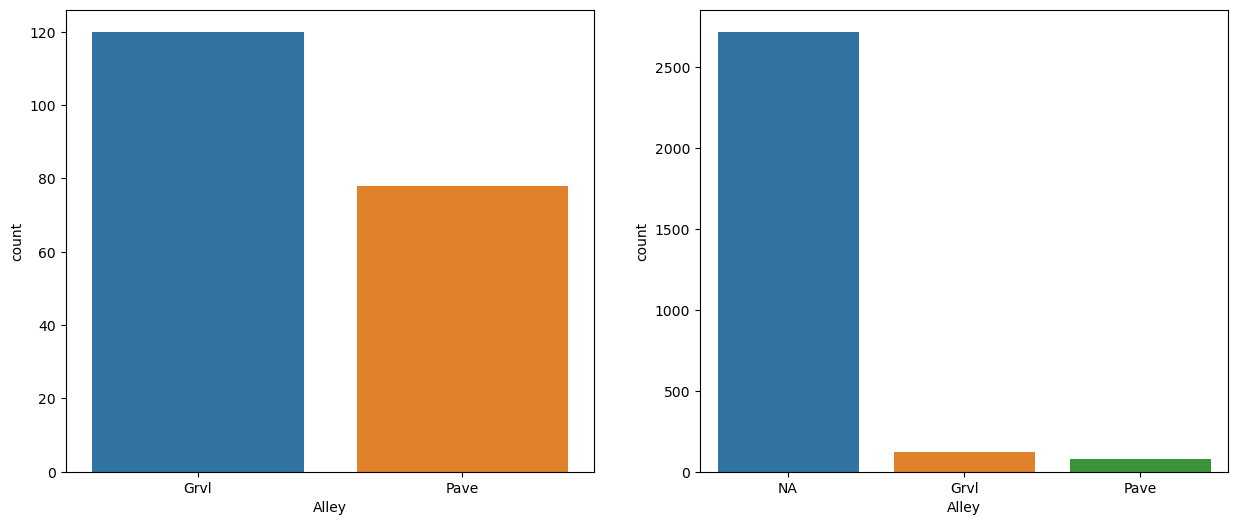

In [40]:
Countplot(df,df_mvi,"Alley")

### Handling LotFrontage = 16.649538

In [41]:
def boxHistPlot(df,figsize = (16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(x=df)
    plt.subplot(122)
    sns.distplot(df)

C:\Users\sanja\AppData\Local\Temp\ipykernel_21600\716753059.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


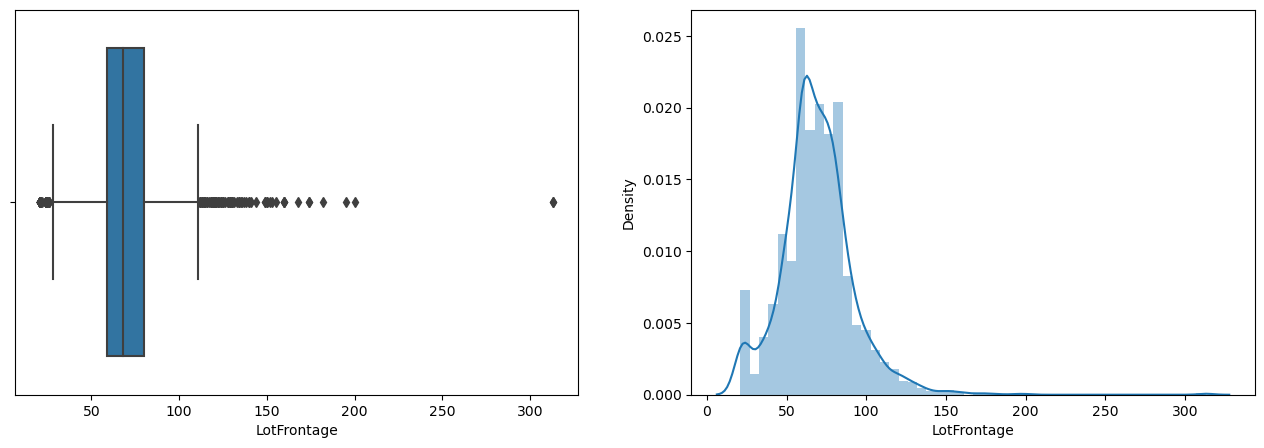

In [42]:
boxHistPlot(df["LotFrontage"])

In [43]:
LotFrontage_median = df["LotFrontage"].median()
df_mvi["LotFrontage"].replace(np.nan,LotFrontage_median,inplace = True)
df_mvi["LotFrontage"].isnull().sum()

0

In [44]:
def BoxDistplot(df,df_new,feature):
    plt.figure(figsize=(15,10))
    plt.subplot(221)
    sns.boxplot(x = df[feature])
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.subplot(223)
    sns.boxplot(x = df_new[feature])
    plt.subplot(224)
    sns.distplot(df_new[feature])

C:\Users\sanja\AppData\Local\Temp\ipykernel_21600\1511511692.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
C:\Users\sanja\AppData\Local\Temp\ipykernel_21600\1511511692.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


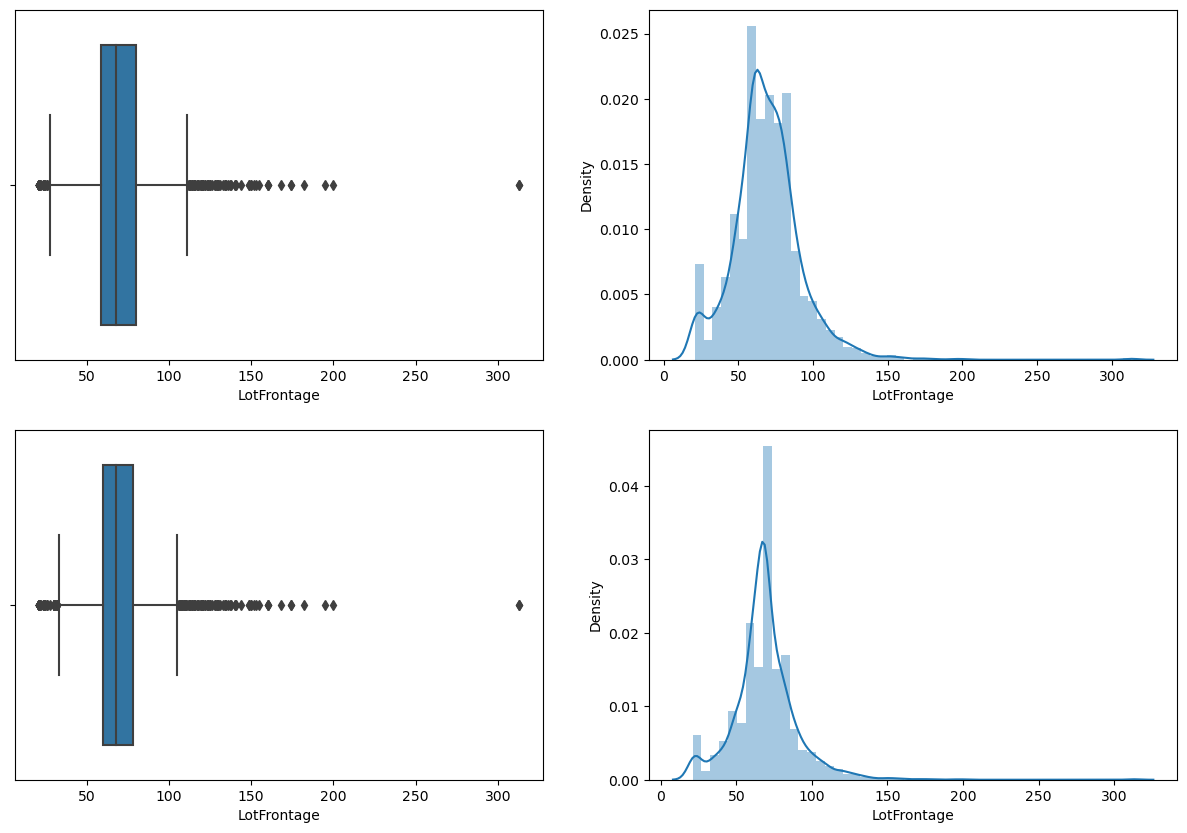

In [45]:
BoxDistplot(df,df_mvi,"LotFrontage")

### Handling Utilities = 0.068517

In [46]:
df["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [47]:
Utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"] = df_mvi["Utilities"].replace(np.nan,Utilities_mode)
df_mvi["Utilities"].isnull().sum()

0

### Handling Exterior1st = 0.034258 & Exterior2nd = 0.034258

In [48]:
df["Exterior1st"].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [49]:
df["Exterior2nd"].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [50]:
E1st_mode = df["Exterior1st"].mode()[0]
df_mvi["Exterior1st"] = df_mvi["Exterior1st"].replace(np.nan,E1st_mode)
df_mvi["Exterior1st"].isnull().sum()

0

In [51]:
E2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior2nd"] = df_mvi["Exterior2nd"].replace(np.nan,E2nd_mode)
df_mvi["Exterior2nd"].isnull().sum()

0

### Handling MasVnrArea = 0.787941 & MasVnrType = 0.822199

In [52]:
masvnrtype_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"] = df_mvi["MasVnrType"].replace(np.nan,masvnrtype_mode)
df_mvi["MasVnrType"].isnull().sum()

0

In [53]:
masvnrarea_cont = 0
df_mvi["MasVnrArea"] = df_mvi["MasVnrArea"].replace(np.nan,masvnrarea_cont)
df_mvi["MasVnrArea"].isnull().sum()

0

### Handling Garage Features
GarageYrBlt = 5.447071  ,GarageCars = 0.034258 & GarageArea = 0.034258

GarageType = 5.378554  ,GarageFinish = 5.447071,GarageQual = 5.447071 & GarageCond = 5.447071

In [54]:
num_garage_feature = ["GarageYrBlt","GarageCars","GarageArea"]
cat_garage_feature = ["GarageType","GarageFinish","GarageQual","GarageCond"]
df_garage = df[num_garage_feature+cat_garage_feature]
df_garage[df_garage.isnull().any(axis = 1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,0.0,0.0,NaN,NaN,NaN,NaN
48,NaN,0.0,0.0,NaN,NaN,NaN,NaN
78,NaN,0.0,0.0,NaN,NaN,NaN,NaN
88,NaN,0.0,0.0,NaN,NaN,NaN,NaN
89,NaN,0.0,0.0,NaN,NaN,NaN,NaN
99,NaN,0.0,0.0,NaN,NaN,NaN,NaN
108,NaN,0.0,0.0,NaN,NaN,NaN,NaN
125,NaN,0.0,0.0,NaN,NaN,NaN,NaN
127,NaN,0.0,0.0,NaN,NaN,NaN,NaN
140,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [55]:
Garageyrblt_cont = 0
df_mvi["GarageYrBlt"] = df_mvi["GarageYrBlt"].replace(np.nan,Garageyrblt_cont)
df_mvi["GarageYrBlt"].isnull().sum()

0

In [56]:
Garagecars_cont = 0
df_mvi["GarageCars"] = df_mvi["GarageCars"].replace(np.nan,Garagecars_cont)
df_mvi["GarageCars"].isnull().sum()

0

In [57]:
GarageArea_cont = 0
df_mvi["GarageArea"] = df_mvi["GarageArea"].replace(np.nan,GarageArea_cont)
df_mvi["GarageArea"].isnull().sum()

0

In [58]:
garage_cont = "NA"
df_mvi["GarageType"] = df_mvi["GarageType"].replace(np.nan,garage_cont)
df_mvi["GarageFinish"] = df_mvi["GarageFinish"].replace(np.nan,garage_cont)
df_mvi["GarageCond"] = df_mvi["GarageCond"].replace(np.nan,garage_cont)
df_mvi["GarageQual"] = df_mvi["GarageQual"].replace(np.nan,garage_cont)

In [59]:
df_mvi["GarageQual"].isnull().sum()

0

### Handling Bsmt Features
BsmtFullBath = 0.068517 & BsmtHalfBath = 0.068517 & TotalBsmtSF =0.034258,BsmtFinSF1      = 0.034258,BsmtFinSF2 = 0.034258,BsmtUnfSF = 0.034258

BsmtQual = 2.774923,BsmtCond = 2.809181,BsmtExposure = 2.809181,BsmtFinType1 = 2.706406 & BsmtFinType2 = 2.740665

In [60]:
Bsmt_cont = "NA"
df_mvi["BsmtQual"] = df_mvi["BsmtQual"].replace(np.nan,Bsmt_cont)
df_mvi["BsmtCond"] = df_mvi["BsmtCond"].replace(np.nan,Bsmt_cont)
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].replace(np.nan,Bsmt_cont)
df_mvi["BsmtFinType1"] = df_mvi["BsmtFinType1"].replace(np.nan,Bsmt_cont)
df_mvi["BsmtFinType2"] = df_mvi["BsmtFinType2"].replace(np.nan,Bsmt_cont)

In [61]:
Bsmt_float_cond = 0
df_mvi["BsmtFullBath"] = df_mvi["BsmtFullBath"].replace(np.nan,Bsmt_float_cond)
df_mvi["BsmtHalfBath"] = df_mvi["BsmtHalfBath"].replace(np.nan,Bsmt_float_cond)
df_mvi["TotalBsmtSF"] = df_mvi["TotalBsmtSF"].replace(np.nan,Bsmt_float_cond)
df_mvi["BsmtFinSF1"] = df_mvi["BsmtFinSF1"].replace(np.nan,Bsmt_float_cond)
df_mvi["BsmtFinSF2"] = df_mvi["BsmtFinSF2"].replace(np.nan,Bsmt_float_cond)


In [62]:
df_mvi["BsmtUnfSF"] = df_mvi["BsmtUnfSF"].replace(np.nan,Bsmt_float_cond)

In [63]:
df_mvi["BsmtFinSF2"].isnull().sum()

0

### Handling remaining categorical features

In [64]:
df["Electrical"].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [65]:
df["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [66]:
Electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"] = df_mvi["Electrical"].replace(np.nan,Electrical_mode)
df_mvi["Electrical"].isnull().sum()

0

In [67]:
Kitchen_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"] = df_mvi["KitchenQual"].replace(np.nan,Kitchen_mode)
df_mvi["KitchenQual"].isnull().sum()

0

### Handling Functional = 0.068517  , FireplaceQu = 48.646797,PoolQC = 99.657417,Fence  = 80.438506,MiscFeature = 96.402878

In [68]:
Functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"] = df_mvi["Functional"].replace(np.nan,Functional_mode)
df_mvi["Functional"].isnull().sum()

0

In [69]:
general_cont = "NA"
df_mvi["FireplaceQu"] = df_mvi["FireplaceQu"].replace(np.nan,general_cont)
df_mvi["PoolQC"] = df_mvi["PoolQC"].replace(np.nan,general_cont)
df_mvi["Fence"] = df_mvi["Fence"].replace(np.nan,general_cont)
df_mvi["MiscFeature"] = df_mvi["MiscFeature"].replace(np.nan,general_cont)

In [70]:
df_mvi["MiscFeature"].isnull().sum()

0

In [71]:
Saletype_mode = df["SaleType"].mode()[0]
df_mvi["SaleType"] = df_mvi["SaleType"].replace(np.nan,Saletype_mode)
df_mvi["SaleType"].isnull().sum()

0

In [72]:
df_mvi.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Feature transformation
### Convert numerical feature to categorical feature

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [74]:
 calendar.month_abbr[1]

'Jan'

In [75]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x :calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [76]:
df_mvi["YrSold"] = df_mvi["YrSold"].astype(str)
df_mvi["MSSubClass"] = df_mvi["MSSubClass"].astype(str)
df_mvi["YearRemodAdd"] = df_mvi["YearRemodAdd"].astype(str)
df_mvi["GarageYrBlt"] = df_mvi["GarageYrBlt"].astype(str)
df_mvi["YearBuilt"] = df_mvi["YearBuilt"].astype(str)

In [77]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## Convert Categorical features to Numerical features
### Ordinal Encoding

In [78]:
ordinal_end_var = [
"ExterQual",    
"ExterCond",
"BsmtQual",     
"BsmtCond",       
"BsmtExposure",   
"BsmtFinType1",         
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageQual",
"GarageCond",
"PoolQC",
"Functional",
"GarageFinish",
"PavedDrive",
"Utilities"
]
print("Total number of features to convert into numerical format:",len(ordinal_end_var))

Total number of features to convert into numerical format: 17


In [79]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})

In [80]:
df_mvi["ExterCond"] = df_mvi["ExterCond"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})

In [81]:
df_mvi["BsmtQual"] = df_mvi["BsmtQual"].map({"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

In [82]:
df_mvi["BsmtCond"] = df_mvi["BsmtCond"].map({"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

In [83]:
df_mvi["HeatingQC"] = df_mvi["HeatingQC"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})

In [84]:
df_mvi["KitchenQual"] = df_mvi["KitchenQual"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})

In [85]:
df_mvi["FireplaceQu"] = df_mvi["FireplaceQu"].map({"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

In [86]:
df_mvi["GarageCond"] = df_mvi["GarageCond"].map({"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

In [87]:
df_mvi["GarageQual"] = df_mvi["GarageQual"].map({"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

In [88]:
df_mvi["PoolQC"] = df_mvi["PoolQC"].map({"NA":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})

In [89]:
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].map({"NA":0,"No":1,"Mn":2,"Av":3,"Gd":4})

In [90]:
df_mvi["BsmtFinType1"] = df_mvi["BsmtFinType1"].map({"NA":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6})

In [91]:
df_mvi["BsmtFinType2"] = df_mvi["BsmtFinType2"].map({"NA":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6})

In [92]:
df_mvi["Functional"] = df_mvi["Functional"].map({"Sal":0,"Sev":1,"Maj2":2,"Maj1":3,"Mod":4,"Min2":5,"Min1":6,"Typ":7})

In [93]:
df_mvi["GarageFinish"] = df_mvi["GarageFinish"].map({"NA":0,"Unf":1,"RFn":2,"Fin":3})

In [94]:
df_mvi["PavedDrive"] = df_mvi["PavedDrive"].map({"N":0,"P":1,"Y":2})

In [95]:
df_mvi["Utilities"] = df_mvi["Utilities"].map({"ELO":0,"NoSeWa":1,"NoSeWr":2,"AllPub":3})

In [96]:
df_mvi.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### One Hot Encoding for Nominal Categorical Data

In [97]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   int64  
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [98]:
df_encod = df_mvi.copy()
object_features = df_encod.select_dtypes(include = 'object').columns.tolist()
print("Total object data type features: ",len(object_features))
print("Features: \n",object_features)

Total object data type features:  32
Features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [99]:
df_encod = pd.get_dummies(df_encod,columns = object_features,prefix=object_features,drop_first=True,dtype=int)

In [100]:
df_encod.shape

(2919, 514)

## Split data for Training and Testing

In [101]:
df_encod.drop(["Id"],axis=1,inplace = True)

In [102]:
df_encod.shape

(2919, 513)

In [103]:
len_train = dftrain_data.shape[0]
len_train

1460

In [104]:
X_train = df_encod[:len_train].drop("SalePrice",axis=1)
Y_train = df_encod["SalePrice"][:len_train]

X_test = df_encod[len_train:].drop("SalePrice",axis=1)
print("Shape of X_train data",X_train.shape)
print("Shape of Y_train data",Y_train.shape)
print("Shape of X_test data",X_test.shape)

Shape of X_train data (1460, 512)
Shape of Y_train data (1460,)
Shape of X_test data (1459, 512)


In [105]:
df_encod.isnull().sum()

LotFrontage                 0
LotArea                     0
Utilities                   0
OverallQual                 0
OverallCond                 0
MasVnrArea                  0
ExterQual                   0
ExterCond                   0
BsmtQual                    0
BsmtCond                    0
BsmtExposure                0
BsmtFinType1                0
BsmtFinSF1                  0
BsmtFinType2                0
BsmtFinSF2                  0
BsmtUnfSF                   0
TotalBsmtSF                 0
HeatingQC                   0
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                0
BsmtHalfBath                0
FullBath                    0
HalfBath                    0
BedroomAbvGr                0
KitchenAbvGr                0
KitchenQual                 0
TotRmsAbvGrd                0
Functional                  0
Fireplaces                  0
FireplaceQu                 0
GarageFini

## Feature Scaling

In [106]:
sc = StandardScaler()
sc.fit(X_train)

#z = (x-u)/s formula  u=mean of every feature ,s=standard deviation
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [107]:
### Carry forward for deployment
#sc.mean
#sc.n_features_in_
#sc.feature_names_in_
#sc.scale_
#sc.with_mean
#sc.n_features_in_
#sc.n_samples_seen_

# Train ML Model

In [108]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [109]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [110]:
svr  = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
mlpr = MLPRegressor()
ir = IsotonicRegression()

In [111]:
models = {"a":["LinearRegression",lr],
          "b":["SVR",svr],
          "c":["SGDRegressor",sgdr],
          "d":["KNeighborsRegressor",knr],
          "e":["GaussianProcessRegressor",gpr],
          "f":["DecisionTreeRegressor",dtr],
          "g":["GradientBoostingRegressor",gbr],
          "h":["RandomForestRegressor",rfr],
          "i":["XGBRegressor",xgbr],
          "j":["MLPRegressor",mlpr],
          "k":["IsotonicRegression",ir]
         }

In [112]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score

def test_model(model,X_train = X_train,Y_train = Y_train):
    cv = KFold(n_splits = 7,shuffle = True,random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model,X_train,Y_train,cv = cv,scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [113]:
models_score = []
for model in models:
    print("Training model : ",models[model][0])
    score = test_model(models[model][1],X_train,Y_train)
    print("Score of model: ",score)
    models_score.append([models[model][0],score[0]])

Training model :  LinearRegression
Score of model:  [-9.894316886673077e+25]
Training model :  SVR
Score of model:  [-0.05213355527392575]
Training model :  SGDRegressor
Score of model:  [-4899.0226712169315]
Training model :  KNeighborsRegressor
Score of model:  [0.558581711576099]
Training model :  GaussianProcessRegressor
Score of model:  [-5.3989120084143805]
Training model :  DecisionTreeRegressor
Score of model:  [0.6840314666533408]
Training model :  GradientBoostingRegressor
Score of model:  [0.8692037272989167]
Training model :  RandomForestRegressor
Score of model:  [0.8461854316057007]
Training model :  XGBRegressor
Score of model:  [0.8609859318559222]
Training model :  MLPRegressor


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Score of model:  [-4.830937391718736]
Training model :  IsotonicRegression


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\isotonic.py", line 351, in fit
    X, y = self._build_y(X, y, sample_weight)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\isotonic.py", line 266, in _build_y
    self._check_input_data_shape(X)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\isotonic.py", line 250, in _check_input_data_shape
    raise ValueError(msg)
ValueError: Isotonic regression input X should be a 1d array or 2d array with 1 feature


In [114]:
gbr.fit(X_train,Y_train)

GradientBoostingRegressor()